In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/csv/df_Bowling.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     1220 non-null   object 
 1   Ball Name   1220 non-null   object 
 2   Issue       1220 non-null   object 
 3   Cover       1220 non-null   object 
 4   Cover Name  1178 non-null   object 
 5   Box Finish  1220 non-null   object 
 6   Core Name   880 non-null    object 
 7   RG          1220 non-null   float64
 8   Diff        1220 non-null   float64
 9   Int         1220 non-null   float64
 10  Trq         1220 non-null   float64
 11  Len         1220 non-null   float64
 12  Back        1220 non-null   float64
 13  Hook        1220 non-null   float64
 14  St-O        902 non-null    float64
 15  St-M        1201 non-null   float64
 16  St-D        697 non-null    float64
 17  St-S        1187 non-null   float64
 18  Tw-O        906 non-null    float64
 19  Tw-M        1205 non-null  

In [7]:
df_spec = df.iloc[:,0:14]
df_spec.head()

,Company,Ball Name,Issue,Cover,Cover Name,Box Finish,Core Name,RG,Diff,Int,Trq,Len,Back,Hook
0,Brunswick,Intense Mindset,June 2024,R Prl,HK22 - Evolution Pearl,500 / 1K / 1.5K SiaAir / Crown Factory Compound,Mindset,2.487,0.050,0.021,8.6,16.1,18.3,59.8
1,Columbia 300,Messenger PowerCOR Black/Gold Pearl,June 2024,R Prl,HK22 - Reflex Pearl,500 / 1K / 2K SiaAir / Factory Compound,Messenger PowerCOR,2.515,0.040,0.000,7.9,16.7,18.1,53.0
2,Radical,Max Bias,June 2024,R Hyb,HK22+ Textured Hybrid,500 / 1.5K SiaAir,Maximum Results Asymmetric,2.494,0.050,0.030,7.9,11.0,18.3,66.5
3,Radical,Rattler NU,June 2024,Not Urethane,Not Urethane,500 / 1K SiaAir,Rattler Symmetric,2.480,0.035,0.000,6.8,12.0,17.0,54.0
4,Storm,Ion Pro,June 2024,R Hyb,TX-16 Hybrid Reactive,4K Abrl,Element Tour AI,2.470,0.035,0.014,8.3,14.0,17.9,55.9


In [9]:
df_spec.drop('Cover Name', axis =1, inplace=True)

In [10]:
df_spec.drop('Core Name', axis =1, inplace =True)

In [12]:
df_spec.isnull().sum()


,0
Company,0
Ball Name,0
Issue,0
Cover,0
Box Finish,0
RG,0
Diff,0
Int,0
Trq,0
Len,0


In [13]:

import re

# Assuming you already have the DataFrame df_st

def extract_last_number(text):
    # Regular expression to find numbers, allowing 'K' for thousands
    matches = re.findall(r'(\d+\.?\d*)K?', text)

    if matches:
        # Return the last match, converting it to a float (and handling 'K')
        last_match = matches[-1]
        if 'K' in text:
            return float(last_match)  # Return as a number, already in thousand
        else:
            return float(last_match)
    return None

# Apply the function to the 'Box Finish' column
df_spec['Box Finish'] = df_spec['Box Finish'].apply(extract_last_number)

In [15]:
df_spec['Box Finish'] = df_spec['Box Finish'] * 1000

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_spec['Cover'] = label_encoder.fit_transform(df_spec['Cover'])  # Encode the 'Cover' column

In [22]:
df_spec.dropna(inplace=True)

In [25]:
df_spec.head()

,Company,Ball Name,Issue,Cover,Box Finish,RG,Diff,Int,Trq,Len,Back,Hook
0,Brunswick,Intense Mindset,June 2024,6,1500.0,2.487,0.050,0.021,8.6,16.1,18.3,59.8
1,Columbia 300,Messenger PowerCOR Black/Gold Pearl,June 2024,6,2000.0,2.515,0.040,0.000,7.9,16.7,18.1,53.0
2,Radical,Max Bias,June 2024,5,1500.0,2.494,0.050,0.030,7.9,11.0,18.3,66.5
3,Radical,Rattler NU,June 2024,1,1000.0,2.480,0.035,0.000,6.8,12.0,17.0,54.0
4,Storm,Ion Pro,June 2024,5,4000.0,2.470,0.035,0.014,8.3,14.0,17.9,55.9


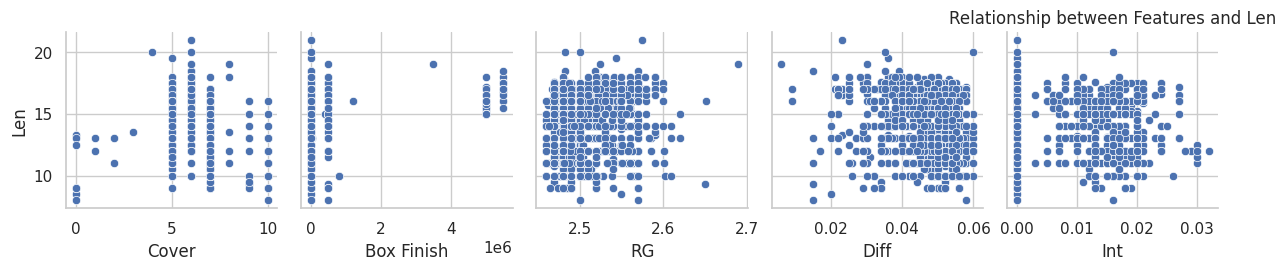

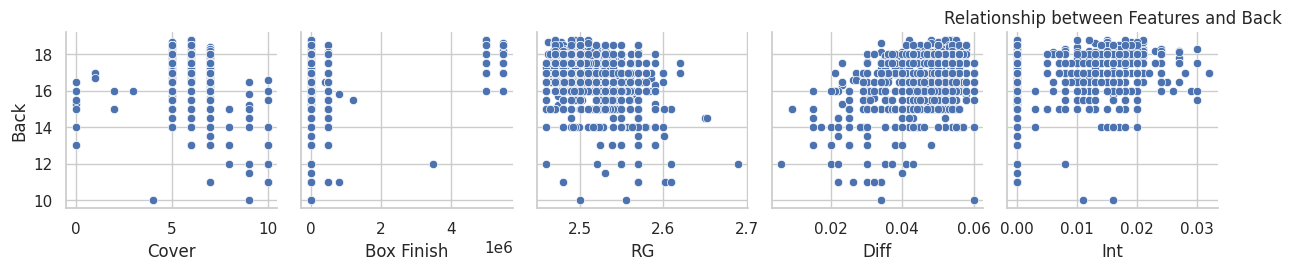

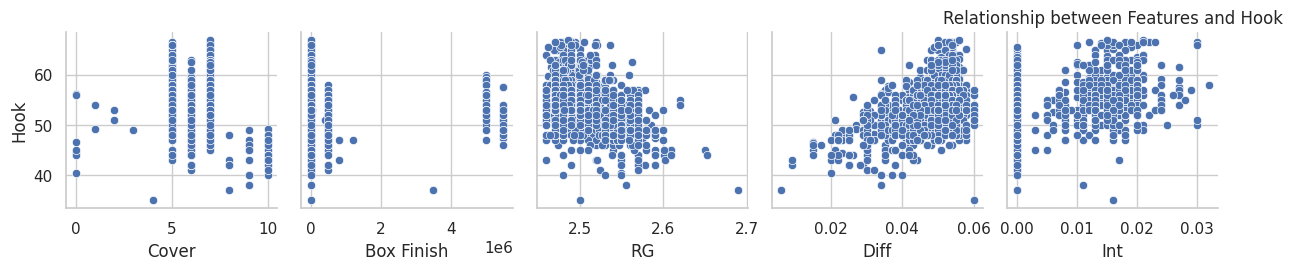

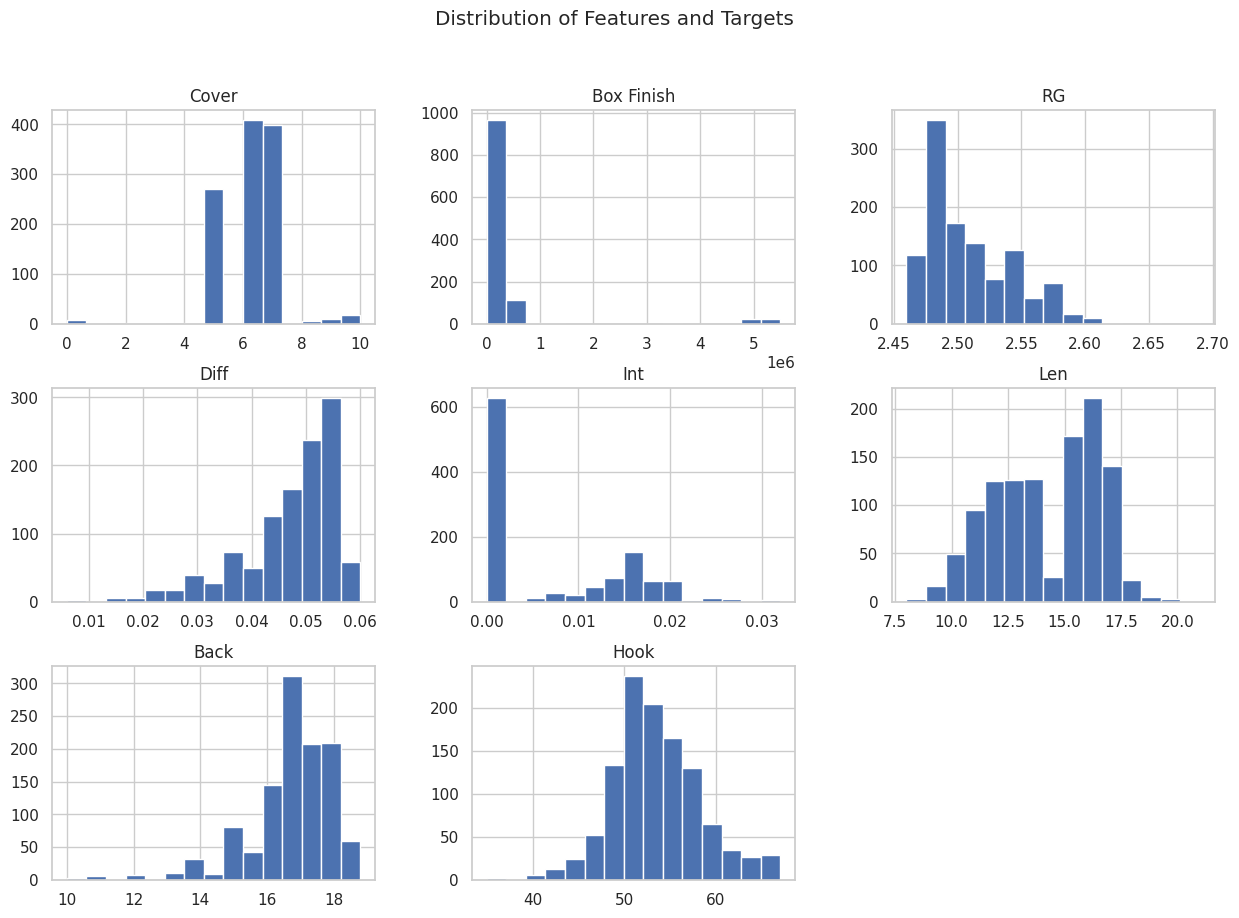

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Pairplot for features against each target
for target in ['Len', 'Back', 'Hook']:
    sns.pairplot(df_spec, x_vars=['Cover', 'Box Finish', 'RG', 'Diff', 'Int'], y_vars=[target], kind='scatter')
    plt.title(f'Relationship between Features and {target}')
    plt.show()

# Histograms for the features and targets
df_spec[['Cover', 'Box Finish', 'RG', 'Diff', 'Int', 'Len', 'Back', 'Hook']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features and Targets')
plt.show()


<Axes: xlabel='Cover', ylabel='Len'>

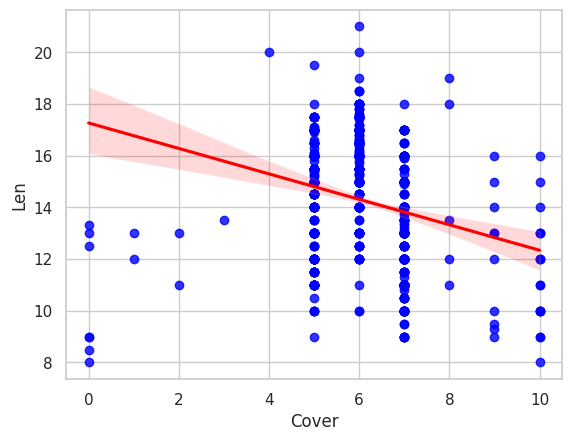

In [37]:
sns.regplot(
    data=df_spec,
    x='Cover',
    y='Len',
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)

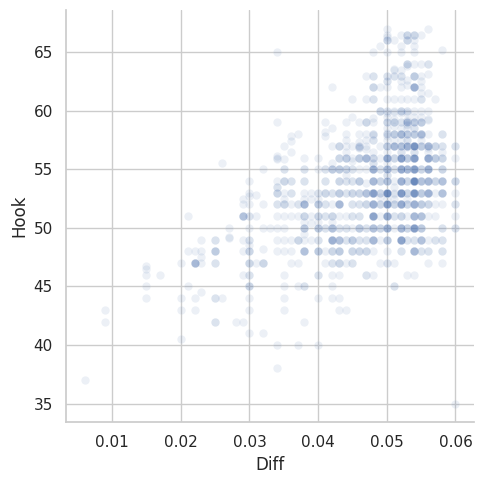

In [43]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
sns.relplot(
    data=df_spec,
    x='Diff',
    y='Hook',
    kind='scatter',
    alpha = 0.1
)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selecting the features and targets
X = df_spec[['Cover', 'Box Finish', 'RG', 'Diff', 'Int']]  # Features
y = df_spec[['Len', 'Back', 'Hook']]  # Targets

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Displaying shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (898, 5)
X_test shape: (225, 5)
y_train shape: (898, 3)
y_test shape: (225, 3)


In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# Define the base models, adding CatBoost, LightGBM, Extra Trees, and KNeighbors
estimators = [
    ('rf', RandomForestRegressor(n_estimators=300, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR()),
    ('cat', CatBoostRegressor(verbose=0)),
    ('etr', ExtraTreesRegressor(n_estimators=200, random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

# Final model (Ridge Regression) used to combine the predictions
final_estimator = Ridge()

# Stacking Regressor
stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# Fit the stacked model
multi_stack = MultiOutputRegressor(stack_reg)
multi_stack.fit(X_train, y_train)

# Predict on the test data
y_pred_stack = multi_stack.predict(X_test)

# Evaluate the stacked model
mse_stack = mean_squared_error(y_test, y_pred_stack, multioutput='raw_values')
r2_stack = r2_score(y_test, y_pred_stack, multioutput='variance_weighted')

# Output the evaluation metrics
print("Advanced Stacked Model MSE:", mse_stack)
print("Advanced Stacked Model R-squared:", r2_stack)

Advanced Stacked Model MSE: [ 2.89926238  1.07839261 10.86211144]
Advanced Stacked Model R-squared: 0.5480458261946494


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 5.278394801626723
R^2 Score: 0.4516670932283427
